# **Predictive Maintenance: Machine Failure Classification**

In [ ]:
!mkdir -p ./datasets


!kaggle competitions download -c playground-series-s3e17 -p ./datasets

!unzip ./datasets/playground-series-s3e17.zip  -d ./datasets
!rm ./datasets/playground-series-s3e17.zip




  0% 0.00/3.49M [00:00<?, ?B/s]
100% 3.49M/3.49M [00:00<00:00, 149MB/s]
Archive:  ./datasets/playground-series-s3e17.zip
replace ./datasets/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/sample_submission.csv  
  inflating: ./datasets/test.csv     
  inflating: ./datasets/train.csv    


In [ ]:
import pandas as pd
df = pd.read_csv('./datasets/train.csv')
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
df = df.drop(columns=['id','Product ID'])
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


##1. Classes are divided into 0 or 1, where 0 indicates that the machine is functioning properly, and 1 indicates that the machine is faulty.
##It can be observed that the class distribution is imbalanced, with over 100,000 functioning machines and only slightly more than 2,000 faulty machines.

Machine failure
0    134281
1      2148
Name: count, dtype: int64


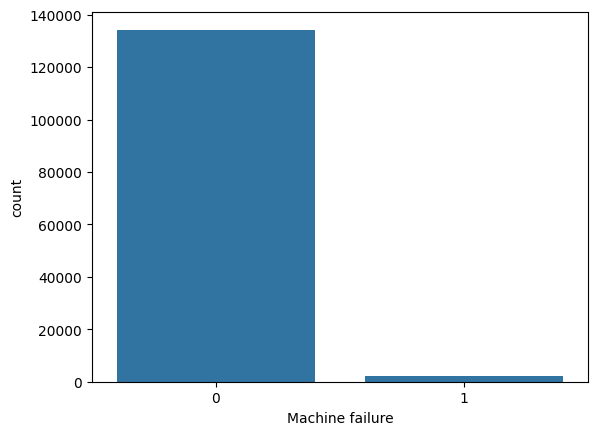

Probability of Machine failure True: 0.01574445315878589
Probability of Machine failure False: 0.9842555468412141


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Machine failure'].value_counts())
sns.countplot(x=df['Machine failure'])
plt.show()

work = df[df['Machine failure']==0]
fail = df[df['Machine failure']==1]

num_work=work['Machine failure'].shape[0]
num_fail=fail['Machine failure'].shape[0]

print(f"Probability of Machine failure True: {num_fail/(num_work+num_fail)}")
print(f"Probability of Machine failure False: {num_work/(num_work+num_fail)}")

In [ ]:
df['Type'] = df['Type'].apply(lambda x: 0 if x == 'H' else(1 if x == 'M' else 2))
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,2,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,1,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,0,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,2,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,2,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df.drop(columns=['Machine failure']))
x_scaled = pd.DataFrame(x_scaled, columns=df.columns.drop('Machine failure'))
x_scaled['Machine failure'] = df['Machine failure']
x_scaled


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1.0,0.582418,0.4750,0.243402,0.443681,0.553360,0.0,0.0,0.0,0.0,0.0,0
1,0.5,0.802198,0.7875,0.339003,0.347527,0.790514,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.439560,0.3375,0.365982,0.311813,0.098814,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.626374,0.6375,0.201173,0.556319,0.778656,0.0,0.0,0.0,0.0,0.0,0
4,0.5,0.296703,0.4000,0.269795,0.434066,0.134387,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.5,0.527473,0.7000,0.204692,0.462912,0.830040,0.0,0.0,0.0,0.0,0.0,0
136425,0.0,0.241758,0.3375,0.156012,0.622253,0.007905,0.0,0.0,0.0,0.0,0.0,0
136426,1.0,0.571429,0.7500,0.201173,0.476648,0.845850,0.0,0.0,0.0,0.0,0.0,0
136427,1.0,0.703297,0.6375,0.156012,0.583791,0.166008,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV


X = x_scaled.drop(columns=['Machine failure'])
y = x_scaled['Machine failure']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**B.   Model - Logistic Regression**

Coefficients: [[-5.42871712e-02  1.76910221e+00 -1.32918299e+00 -3.61140222e-01
   3.92640710e+00  8.23095923e-01  8.61055376e+00  8.73131456e+00
   9.94618302e+00  8.40533558e+00  6.73654073e-03]]


<ipython-input-26-7c7f691fe73d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y=feature_names, palette='viridis')


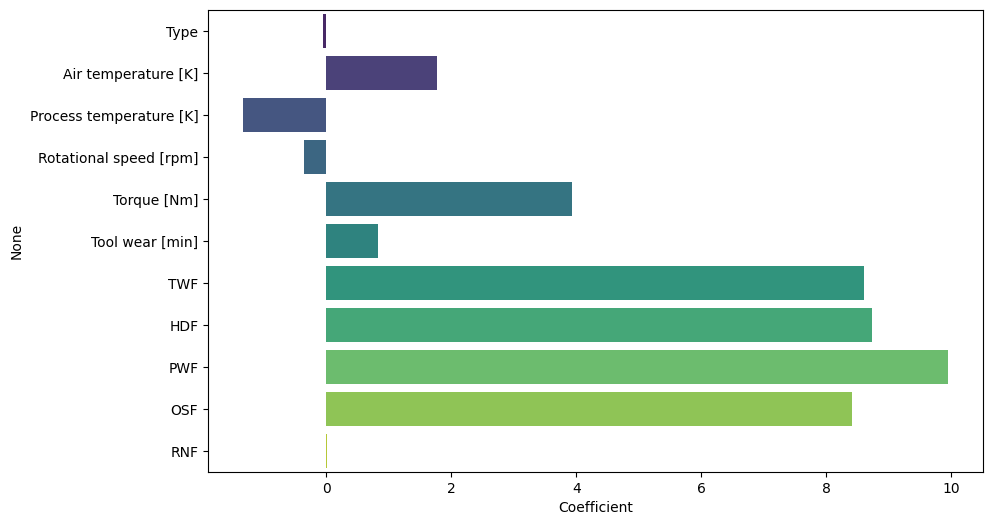

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)

coefficients = model_lr.coef_
print(f"Coefficients: {coefficients}")

coefficients = pd.DataFrame({'Coefficient': coefficients[0]})
feature_names = x_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y=feature_names, palette='viridis')
plt.show()


**Regression Equation:**

$logit(p) = -0.054 \cdot X_1 + 1.769 \cdot X_2 - 1.329 \cdot X_3 - 0.361 \cdot X_4 + 3.926 \cdot X_5 + 0.823 \cdot X_6 + 8.611 \cdot X_7 + 8.731 \cdot X_8 + 9.946 \cdot X_9 + 8.405 \cdot X_{10} + 0.007 \cdot X_{11}$



**Metrics:**      
1. Percision      
2. Recall         
3. Accuracy     
4. F1

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay


y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

print("Classification Report (y train):\n", classification_report(y_train, y_train_pred), "\n")
print("Classification Report (y test):\n", classification_report(y_test, y_test_pred))

Classification Report (y train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    107433
           1       0.99      0.76      0.86      1710

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143
 

Classification Report (y test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



**Confusion Matrix's:**

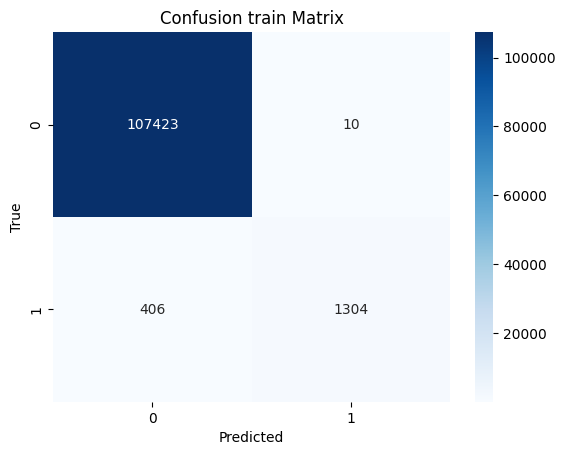

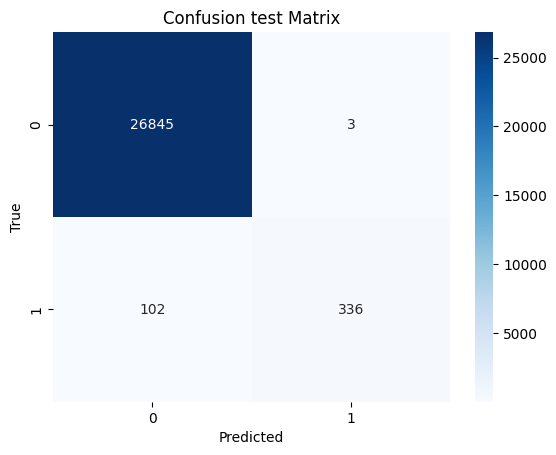

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()

cm2 = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion test Matrix')
plt.show()

**C. Model Regression 2**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


df2 = df.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

x2 = df2.drop(columns=['Machine failure'])
y2 = df2['Machine failure']

x_scaled2 = scaler.fit_transform(x2)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled2, y2, test_size=0.2, random_state=42)

model__lr = LogisticRegression(random_state=42)
model__lr.fit(x_train2, y_train2)

coefficients = model__lr.coef_
print(f"Coefficients: {coefficients}")


Coefficients: [[ 0.36704669  5.92167261 -4.5453404   4.68072434 11.45059783  1.83663453]]


**Regression Equation:**  


$logit(p) = 0.367 \cdot X_1 + 5.922 \cdot X_2 - 4.545 \cdot X_3 + 4.681 \cdot X_4 + 11.451 \cdot X_5 + 1.837 \cdot X_6$


**Metrics and Confusion Matrix**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report (y train):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    107433
           1       0.70      0.04      0.07      1710

    accuracy                           0.98    109143
   macro avg       0.84      0.52      0.53    109143
weighted avg       0.98      0.98      0.98    109143
 

Classification Report (y test):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     26848
           1       0.59      0.03      0.06       438

    accuracy                           0.98     27286
   macro avg       0.79      0.51      0.52     27286
weighted avg       0.98      0.98      0.98     27286



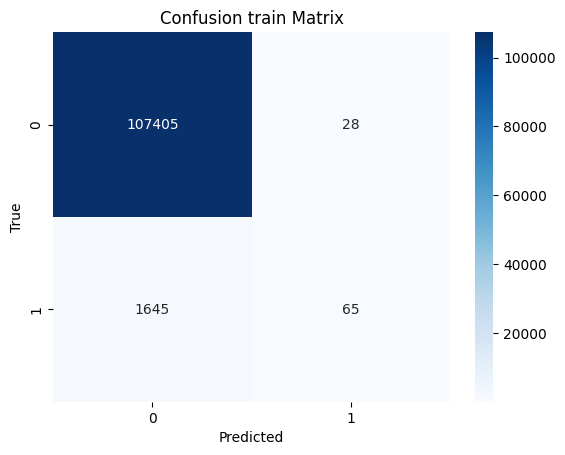

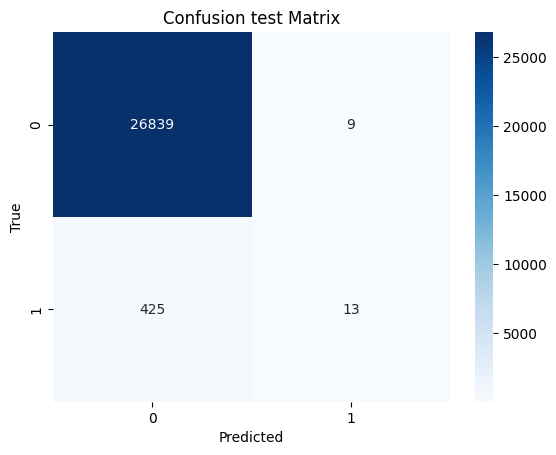

In [ ]:
results = []

lr_configs = [
    {"penalty": "l2", "C": 0.1, "solver": "lbfgs","random_state": 42},
    {"penalty": "l2", "C": 1, "solver": "lbfgs","random_state": 42},
    {"penalty": "l1", "C": 10, "solver": "liblinear","random_state": 42},
    {"penalty": "l2","C": 100, "solver": "lbfgs","random_state": 42}
]

for config in lr_configs:
    model = LogisticRegression(penalty=config["penalty"], C=config["C"], solver=config["solver"],random_state=config["random_state"])
    model.fit(x_train2, y_train2)
    y_pred_test = model.predict(x_test2)
    y_pred_train = model.predict(x_train2)

    # calculate the measure
    train_accuracy = accuracy_score(y_train2, y_pred_train)
    test_accuracy = accuracy_score(y_test2, y_pred_test)
    train_precision = precision_score(y_train2, y_pred_train)
    test_precision = precision_score(y_test2, y_pred_test)
    train_recall = recall_score(y_train2, y_pred_train)
    test_recall = recall_score(y_test2, y_pred_test)
    train_f1 = f1_score(y_train2, y_pred_train)
    test_f1 = f1_score(y_test2, y_pred_test)

    results.append({
        "Model": "Logistic regresstion",
        "Config": config,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1": train_f1,
        "Test F1": test_f1,
    })

print("Classification Report (y train):\n", classification_report(y_train2, y_pred_train), "\n")
print("Classification Report (y test):\n", classification_report(y_test2, y_pred_test))

cm_train_new = confusion_matrix(y_train2, y_pred_train)
sns.heatmap(cm_train_new, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()

cm_test_new = confusion_matrix(y_test2, y_pred_test)
sns.heatmap(cm_test_new, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion test Matrix')
plt.show()


**As shown in the graph, 4 out of the 5 variables we removed are those with the highest weights in the regression equation, while the fifth variable has an almost negligible impact on the equation (insignificant value). After removing these columns, we observed a significant decline in the model's performance accuracy.**

**Difference models:
KNN,
Decision Tree.**     

**Decision Tree Config:**    
1. max_depth: 3, min_samples_split: 2
2. max_depth: 5, min_samples_split: 4
3. max_depth: None, min_samples_split: 2
4. max_depth: 10, min_samples_split: 5

**Decision Tree Config:**    
1. n_neighbors: 3, metric: euclidean
2. n_neighbors: 5, metric: manhattan
3. n_neighbors: 7, metric: euclidean
4. n_neighbors: 9, metric: minkowski

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier


dt_configs = [
    {"max_depth": 3, "min_samples_split": 2},
    {"max_depth": 5, "min_samples_split": 4},
    {"max_depth": None, "min_samples_split": 2},
    {"max_depth": 10, "min_samples_split": 5},
]

# congiguortion for knn
knn_configs = [
    {"n_neighbors": 3, "metric": "euclidean"},
    {"n_neighbors": 5, "metric": "manhattan"},
    {"n_neighbors": 7, "metric": "euclidean"},
    {"n_neighbors": 9, "metric": "minkowski"},
]


# check configuration for the Decision Tree model
for config in dt_configs:
    model = DecisionTreeClassifier(max_depth=config["max_depth"], min_samples_split=config["min_samples_split"])
    model.fit(x_train2, y_train2)
    y_pred_test = model.predict(x_test2)
    y_pred_train = model.predict(x_train2)

    # calculate the measure
    train_accuracy = accuracy_score(y_train2, y_pred_train)
    test_accuracy = accuracy_score(y_test2, y_pred_test)
    train_precision = precision_score(y_train2, y_pred_train)
    test_precision = precision_score(y_test2, y_pred_test)
    train_recall = recall_score(y_train2, y_pred_train)
    test_recall = recall_score(y_test2, y_pred_test)
    train_f1 = f1_score(y_train2, y_pred_train)
    test_f1 = f1_score(y_test2, y_pred_test)

    results.append({
        "Model": "Decision Tree",
        "Config": config,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1": train_f1,
        "Test F1": test_f1,
    })


# check configuration for the KNN model
for config in knn_configs:
    model = KNeighborsClassifier(n_neighbors=config["n_neighbors"], metric=config["metric"])
    model.fit(x_train2, y_train2)
    y_pred_test = model.predict(x_test2)
    y_pred_train = model.predict(x_train2)

    # calculate the measure
    train_accuracy = accuracy_score(y_train2, y_pred_train)
    test_accuracy = accuracy_score(y_test2, y_pred_test)
    train_precision = precision_score(y_train2, y_pred_train)
    test_precision = precision_score(y_test2, y_pred_test)
    train_recall = recall_score(y_train2, y_pred_train)
    test_recall = recall_score(y_test2, y_pred_test)
    train_f1 = f1_score(y_train2, y_pred_train)
    test_f1 = f1_score(y_test2, y_pred_test)

    results.append({
        "Model": "KNN",
        "Config": config,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train F1": train_f1,
        "Test F1": test_f1,
    })




In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,Config,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic regresstion,"{'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs',...",0.984332,0.983948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Logistic regresstion,"{'penalty': 'l2', 'C': 1, 'solver': 'lbfgs', '...",0.984653,0.984204,0.769231,0.769231,0.029240,0.022831,0.056338,0.044346
2,Logistic regresstion,"{'penalty': 'l1', 'C': 10, 'solver': 'liblinea...",0.984671,0.984094,0.698925,0.590909,0.038012,0.029680,0.072102,0.056522
3,Logistic regresstion,"{'penalty': 'l2', 'C': 100, 'solver': 'lbfgs',...",0.984671,0.984094,0.698925,0.590909,0.038012,0.029680,0.072102,0.056522
4,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.985661,0.985047,0.769517,0.714286,0.121053,0.114155,0.209197,0.196850
5,Decision Tree,"{'max_depth': 5, 'min_samples_split': 4}",0.986504,0.985524,0.671491,0.613757,0.271345,0.264840,0.386506,0.370016
6,Decision Tree,"{'max_depth': None, 'min_samples_split': 2}",0.999606,0.977498,0.994072,0.324000,0.980702,0.369863,0.987342,0.345416
7,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.989683,0.984974,0.809322,0.554688,0.446784,0.324201,0.575735,0.409222
8,KNN,"{'n_neighbors': 3, 'metric': 'euclidean'}",0.989097,0.983948,0.786976,0.500000,0.416959,0.216895,0.545107,0.302548
9,KNN,"{'n_neighbors': 5, 'metric': 'manhattan'}",0.987952,0.984827,0.780142,0.581081,0.321637,0.196347,0.455487,0.293515


In [ ]:
sorted_result = results_df.sort_values(by=['Test Recall'], ascending=False)
sorted_result

,Model,Config,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
6,Decision Tree,"{'max_depth': None, 'min_samples_split': 2}",0.999606,0.977498,0.994072,0.324000,0.980702,0.369863,0.987342,0.345416
7,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.989683,0.984974,0.809322,0.554688,0.446784,0.324201,0.575735,0.409222
5,Decision Tree,"{'max_depth': 5, 'min_samples_split': 4}",0.986504,0.985524,0.671491,0.613757,0.271345,0.264840,0.386506,0.370016
8,KNN,"{'n_neighbors': 3, 'metric': 'euclidean'}",0.989097,0.983948,0.786976,0.500000,0.416959,0.216895,0.545107,0.302548
9,KNN,"{'n_neighbors': 5, 'metric': 'manhattan'}",0.987952,0.984827,0.780142,0.581081,0.321637,0.196347,0.455487,0.293515
10,KNN,"{'n_neighbors': 7, 'metric': 'euclidean'}",0.986916,0.985157,0.739796,0.624060,0.254386,0.189498,0.378590,0.290718
11,KNN,"{'n_neighbors': 9, 'metric': 'minkowski'}",0.986367,0.985377,0.735169,0.678899,0.202924,0.168950,0.318057,0.270567
4,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.985661,0.985047,0.769517,0.714286,0.121053,0.114155,0.209197,0.196850
2,Logistic regresstion,"{'penalty': 'l1', 'C': 10, 'solver': 'liblinea...",0.984671,0.984094,0.698925,0.590909,0.038012,0.029680,0.072102,0.056522
3,Logistic regresstion,"{'penalty': 'l2', 'C': 100, 'solver': 'lbfgs',...",0.984671,0.984094,0.698925,0.590909,0.038012,0.029680,0.072102,0.056522


**We selected the two models with the highest recall scores (excluding the model with the best recall score due to overfitting). We focused on the recall metric because it ensures that our model can identify as many faulty machines as possible, thereby helping to prevent financial losses.**

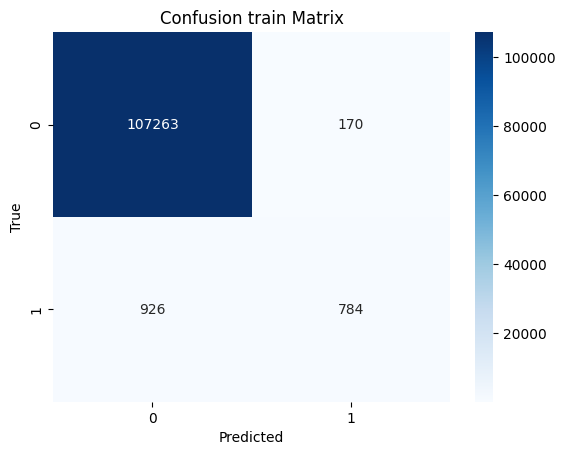

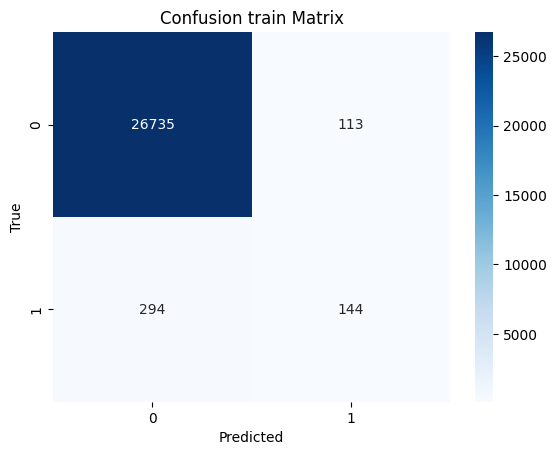

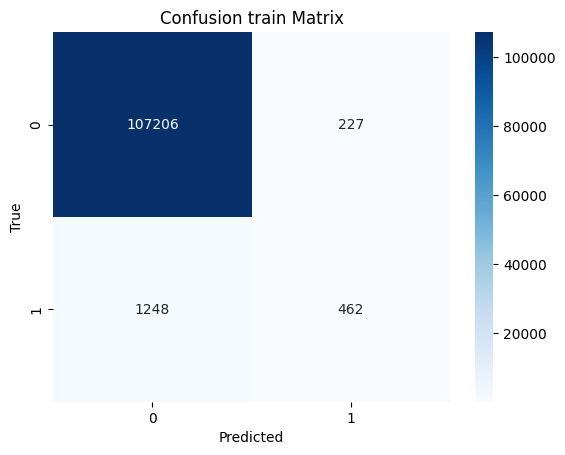

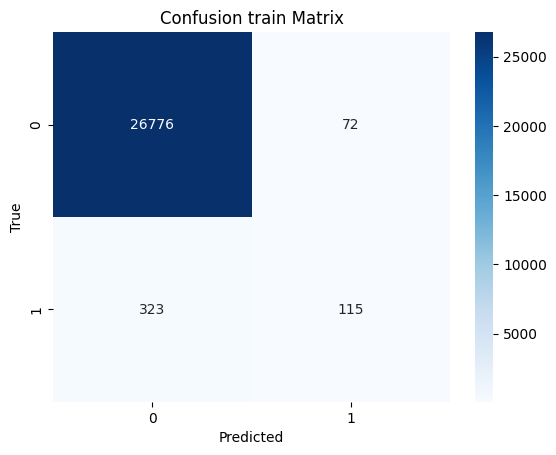

In [ ]:
best_model1 = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
best_model2 = DecisionTreeClassifier(max_depth=5, min_samples_split=4)

best_model1.fit(x_train2, y_train2)
best_model2.fit(x_train2, y_train2)

y_pred_train1 = best_model1.predict(x_train2)
y_pred_test1 = best_model1.predict(x_test2)

y_pred_train2 = best_model2.predict(x_train2)
y_pred_test2 = best_model2.predict(x_test2)

cm_train_new = confusion_matrix(y_train2, y_pred_train1)
sns.heatmap(cm_train_new, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()

cm_train_new2 = confusion_matrix(y_test2, y_pred_test1)
sns.heatmap(cm_train_new2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()

cm_train_new3 = confusion_matrix(y_train2, y_pred_train2)
sns.heatmap(cm_train_new3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()

cm_train_new4 = confusion_matrix(y_test2, y_pred_test2)
sns.heatmap(cm_train_new4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion train Matrix')
plt.show()


**Results table:**

Most important feature: Torque [Nm]
Results before: 

Model                                         Decision Tree
Config             {'max_depth': 5, 'min_samples_split': 4}
Train Accuracy                                     0.986504
Test Accuracy                                      0.985524
Train Precision                                    0.671491
Test Precision                                     0.613757
Train Recall                                       0.271345
Test Recall                                         0.26484
Train F1                                           0.386506
Test F1                                            0.370016
Name: 5, dtype: object
Model                                          Decision Tree
Config             {'max_depth': 10, 'min_samples_split': 5}
Train Accuracy                                      0.989683
Test Accuracy                                       0.984974
Train Precision                                     0.809322
Test Precision    

<Figure size 1200x600 with 0 Axes>

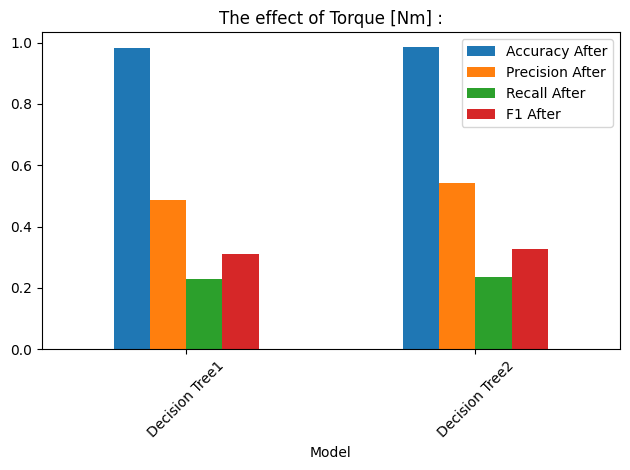

In [ ]:
model_lr.fit(x_train2, y_train2)

coefficients = pd.DataFrame({
    'Feature': x2.columns,
    'Coefficient': abs(model_lr.coef_[0])
})

coefficients = coefficients.sort_values('Coefficient', ascending=False)
most_important_feature = coefficients.iloc[0]['Feature']
print(f"Most important feature: {most_important_feature}")

X_reduced = x_scaled2[:, x2.columns != most_important_feature]
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y2, test_size=0.2, random_state=42)

models = {
    'Decision Tree1': best_model1,
    'Decision Tree2': best_model2
}

bm1 = results_df.iloc[5]
bm2 = results_df.iloc[7]
print("Results before: \n")
print(bm1)
print(bm2)


results_after = []

for name, model in models.items():
    model.fit(x_train_reduced, y_train_reduced)
    y_pred_reduced = model.predict(x_test_reduced)

    new_metrics = {
        'Model': name,
        'Accuracy After': accuracy_score(y_test_reduced, y_pred_reduced),
        'Precision After': precision_score(y_test_reduced, y_pred_reduced),
        'Recall After': recall_score(y_test_reduced, y_pred_reduced),
        'F1 After': f1_score(y_test_reduced, y_pred_reduced)
    }
    results_after.append(new_metrics)

results_comparison = pd.DataFrame(results_after)
print("results after: \n")
print(results_comparison)

plt.figure(figsize=(12, 6))
results_comparison.plot(kind='bar', x='Model', y=['Accuracy After', 'Precision After', 'Recall After', 'F1 After'])
plt.title(f"The effect of {most_important_feature} :")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Removing the most important feature, "Torque," led to a decrease in model performance, especially in terms of precision, recall, and F1-score, despite the small change in accuracy. This suggests that the removed feature played a significant role in improving the model's ability to correctly identify and differentiate between the classes.**